<a href="https://colab.research.google.com/github/sameekshya1999/NextWordPrediction/blob/main/lstm_nextword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
m

In [13]:

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


In [3]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving cinderella.txt to cinderella (1).txt


In [4]:
#Step 3: Open and pre-process the data
file = open("cinderella.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:100]

'Cinderella: A Tale of Hope and Kindness Once upon a time, in a faraway land, there was a kind and ge'

In [5]:
len(data)

5704

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[6, 7, 131, 11, 132, 3, 67, 133, 134, 7, 68, 9, 7, 135, 136]

In [7]:
len(sequence_data)

972

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

379


In [9]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  969


array([[  6,   7, 131,  11],
       [  7, 131,  11, 132],
       [131,  11, 132,   3],
       [ 11, 132,   3,  67],
       [132,   3,  67, 133],
       [  3,  67, 133, 134],
       [ 67, 133, 134,   7],
       [133, 134,   7,  68],
       [134,   7,  68,   9],
       [  7,  68,   9,   7]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  6   7 131]
 [  7 131  11]
 [131  11 132]
 [ 11 132   3]
 [132   3  67]
 [  3  67 133]
 [ 67 133 134]
 [133 134   7]
 [134   7  68]
 [  7  68   9]]
Response:  [ 11 132   3  67 133 134   7  68   9   7]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Split your data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

In [24]:
#Bidirectional LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
model = Sequential()  # Create a Sequential model
model.add(Input(shape=(3, )))  # Define input shape here

model.add(Embedding(vocab_size, 10))
model.add(LSTM(1000, return_sequences=True)) # Add a Bidirectional LSTM layer with 1000 units
model.add(Dropout(0.2))
model.add(LSTM(1000))  # Add another Bidirectional LSTM layer with 1000 units
model.add(Dropout(0.2))
model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
model.add(Dense(vocab_size, activation="softmax"))    # Add the output Dense layer with vocab_size units and softmax activation
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 3, 10)               │           3,790 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 3, 1000)             │       4,044,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3, 1000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 1000)                │       8,004,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 379)                 │         379,379 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,432,169 (51.24 MB)

 Trainable params: 13,432,169 (51.24 MB)

 Non-trainable params: 0 (0.00 B)

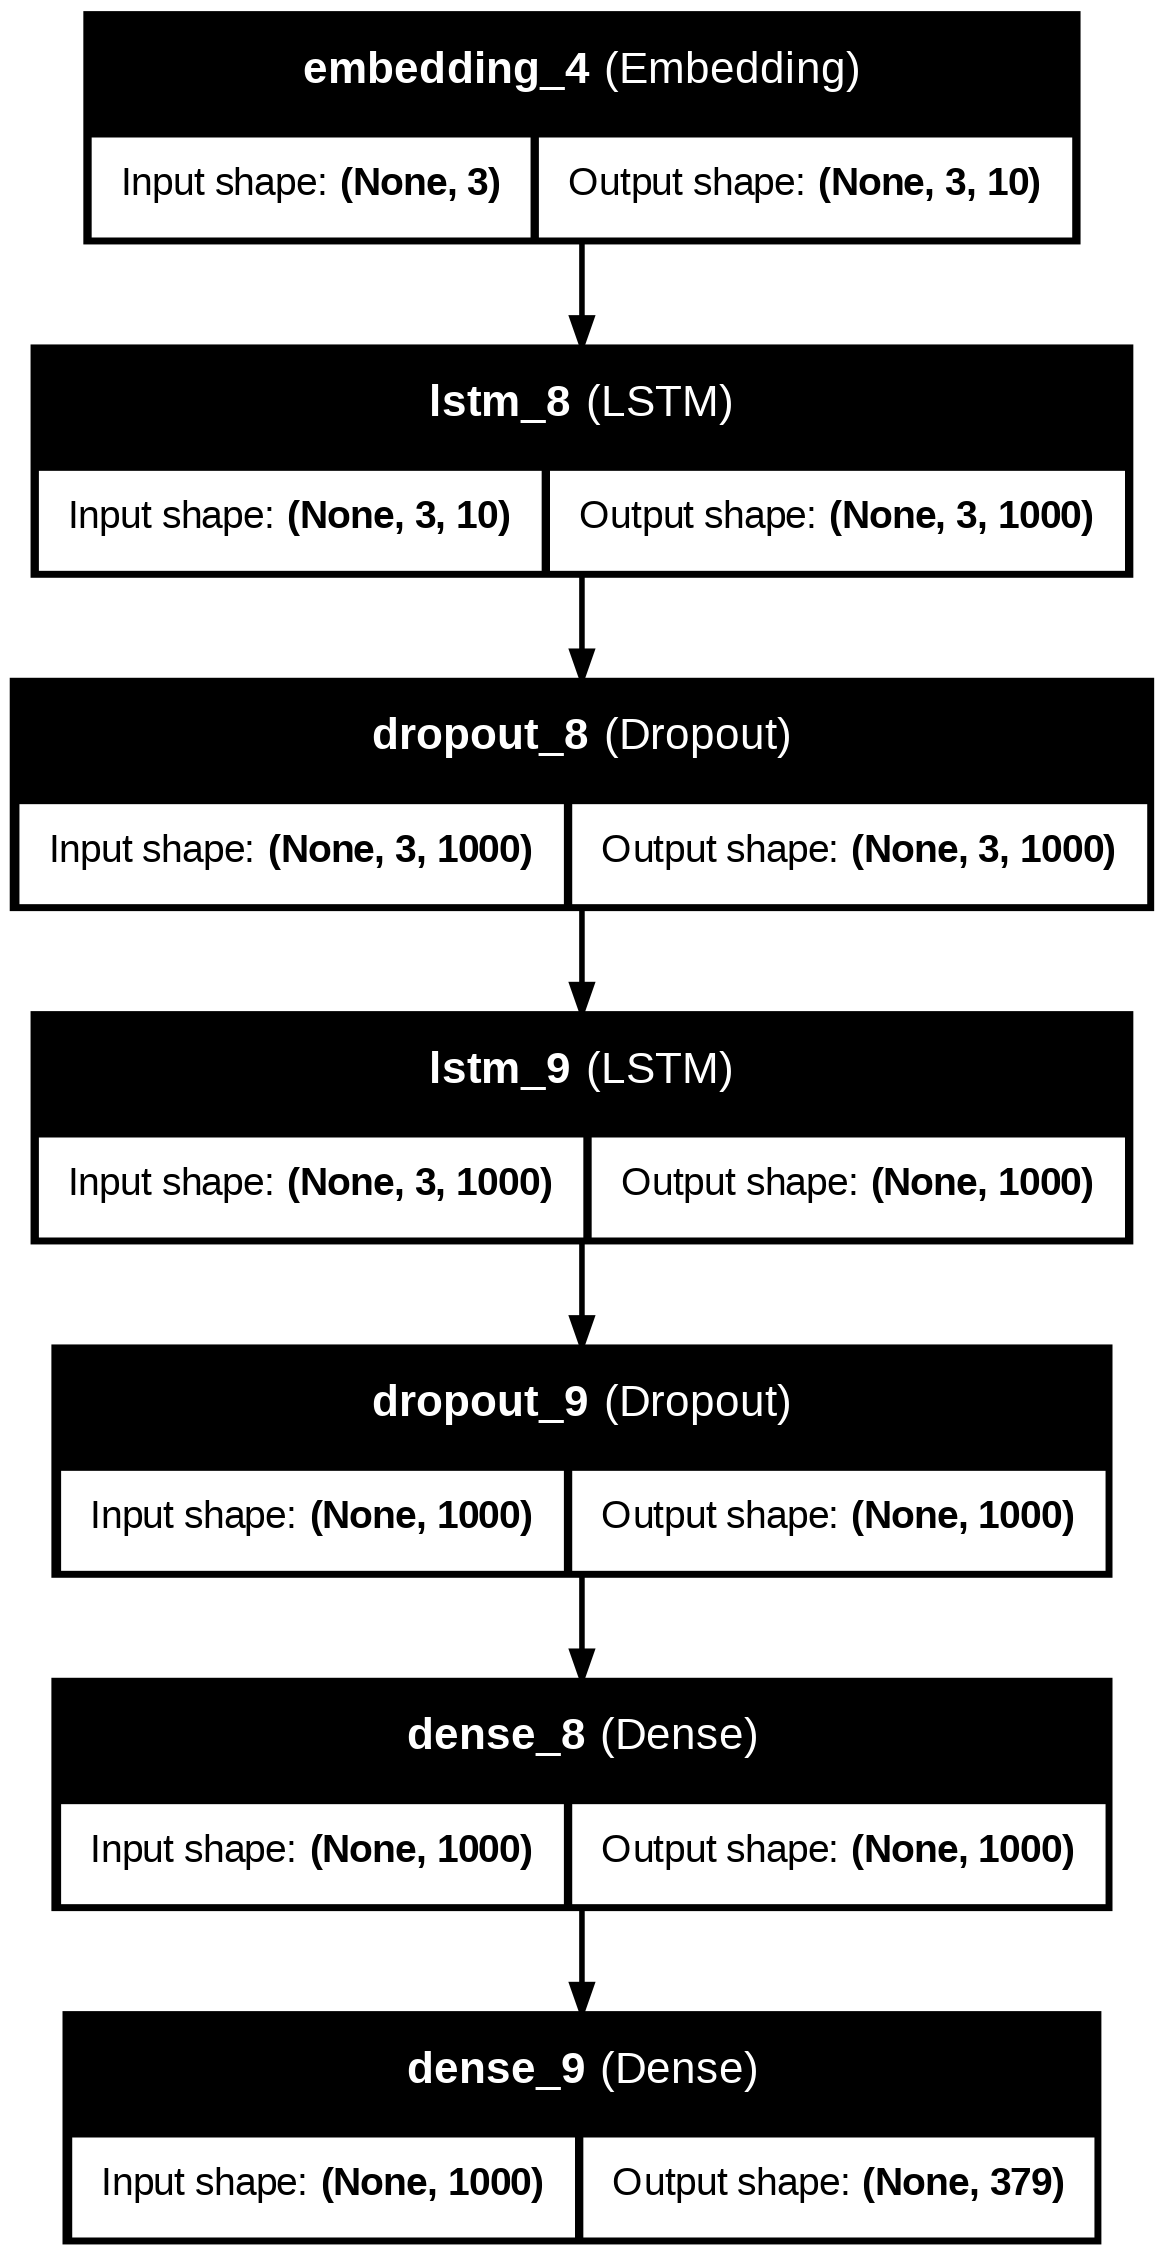

In [25]:

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='plot.png', show_layer_names=True, show_shapes=True)


In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint("next_words.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=50, callbacks=[checkpoint])


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.3012 - loss: 2.5420
Epoch 1: loss improved from inf to 2.75185, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 874ms/step - accuracy: 0.2989 - loss: 2.5537
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.3652 - loss: 2.2589
Epoch 2: loss improved from 2.75185 to 2.33554, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 687ms/step - accuracy: 0.3637 - loss: 2.2632
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.4169 - loss: 2.0460
Epoch 3: loss improved from 2.33554 to 2.10522, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 663ms/step - accuracy: 0.4150 - loss: 2.0493
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.4316 - loss: 1.8379
Epoch 4: loss improved from 2.10522 to 2.00594, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 669ms/step - accuracy: 0.4297 - loss: 1.8472
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━

In [33]:
# Load the LSTM model from the checkpoint
model = load_model("next_words.keras")

# Evaluate the LSTM model on the test data
lstm_test_loss, lstm_test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy for the LSTM model
print("LSTM Test Accuracy:", lstm_test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0187 - loss: 45.6714
LSTM Test Accuracy: 0.027397260069847107


In [34]:
# Load the model and tokenizer
model = load_model('next_words.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [35]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: everyone was captivated by her
['captivated', 'by', 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
beauty
Enter your line: who didn’t recognize her in her magical
['in', 'her', 'magical']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
dress
Enter your line: She reached her
['She', 'reached', 'her']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
carriage
Enter your line: 0
Execution completed.....
